                      Time  air_pressure[mmHg]  \
count                70080        69934.000000   
mean   2014-11-29 23:30:00          734.588143   
min    2010-12-01 00:00:00          716.500000   
25%    2012-11-29 23:45:00          731.400000   
50%    2014-11-29 23:30:00          734.200000   
75%    2016-11-28 23:15:00          737.500000   
max    2018-11-28 23:00:00          757.500000   
std                    NaN            5.011322   

       air_temperature[degree celcius]  relative_humidity[%]  wind_speed[M/S]  \
count                     69903.000000          69903.000000     69125.000000   
mean                         17.871834             60.644178         4.828268   
min                         -14.400000              4.000000         0.000000   
25%                          10.000000             43.000000         3.000000   
50%                          18.900000             61.000000         5.000000   
75%                          25.600000             79.000000   

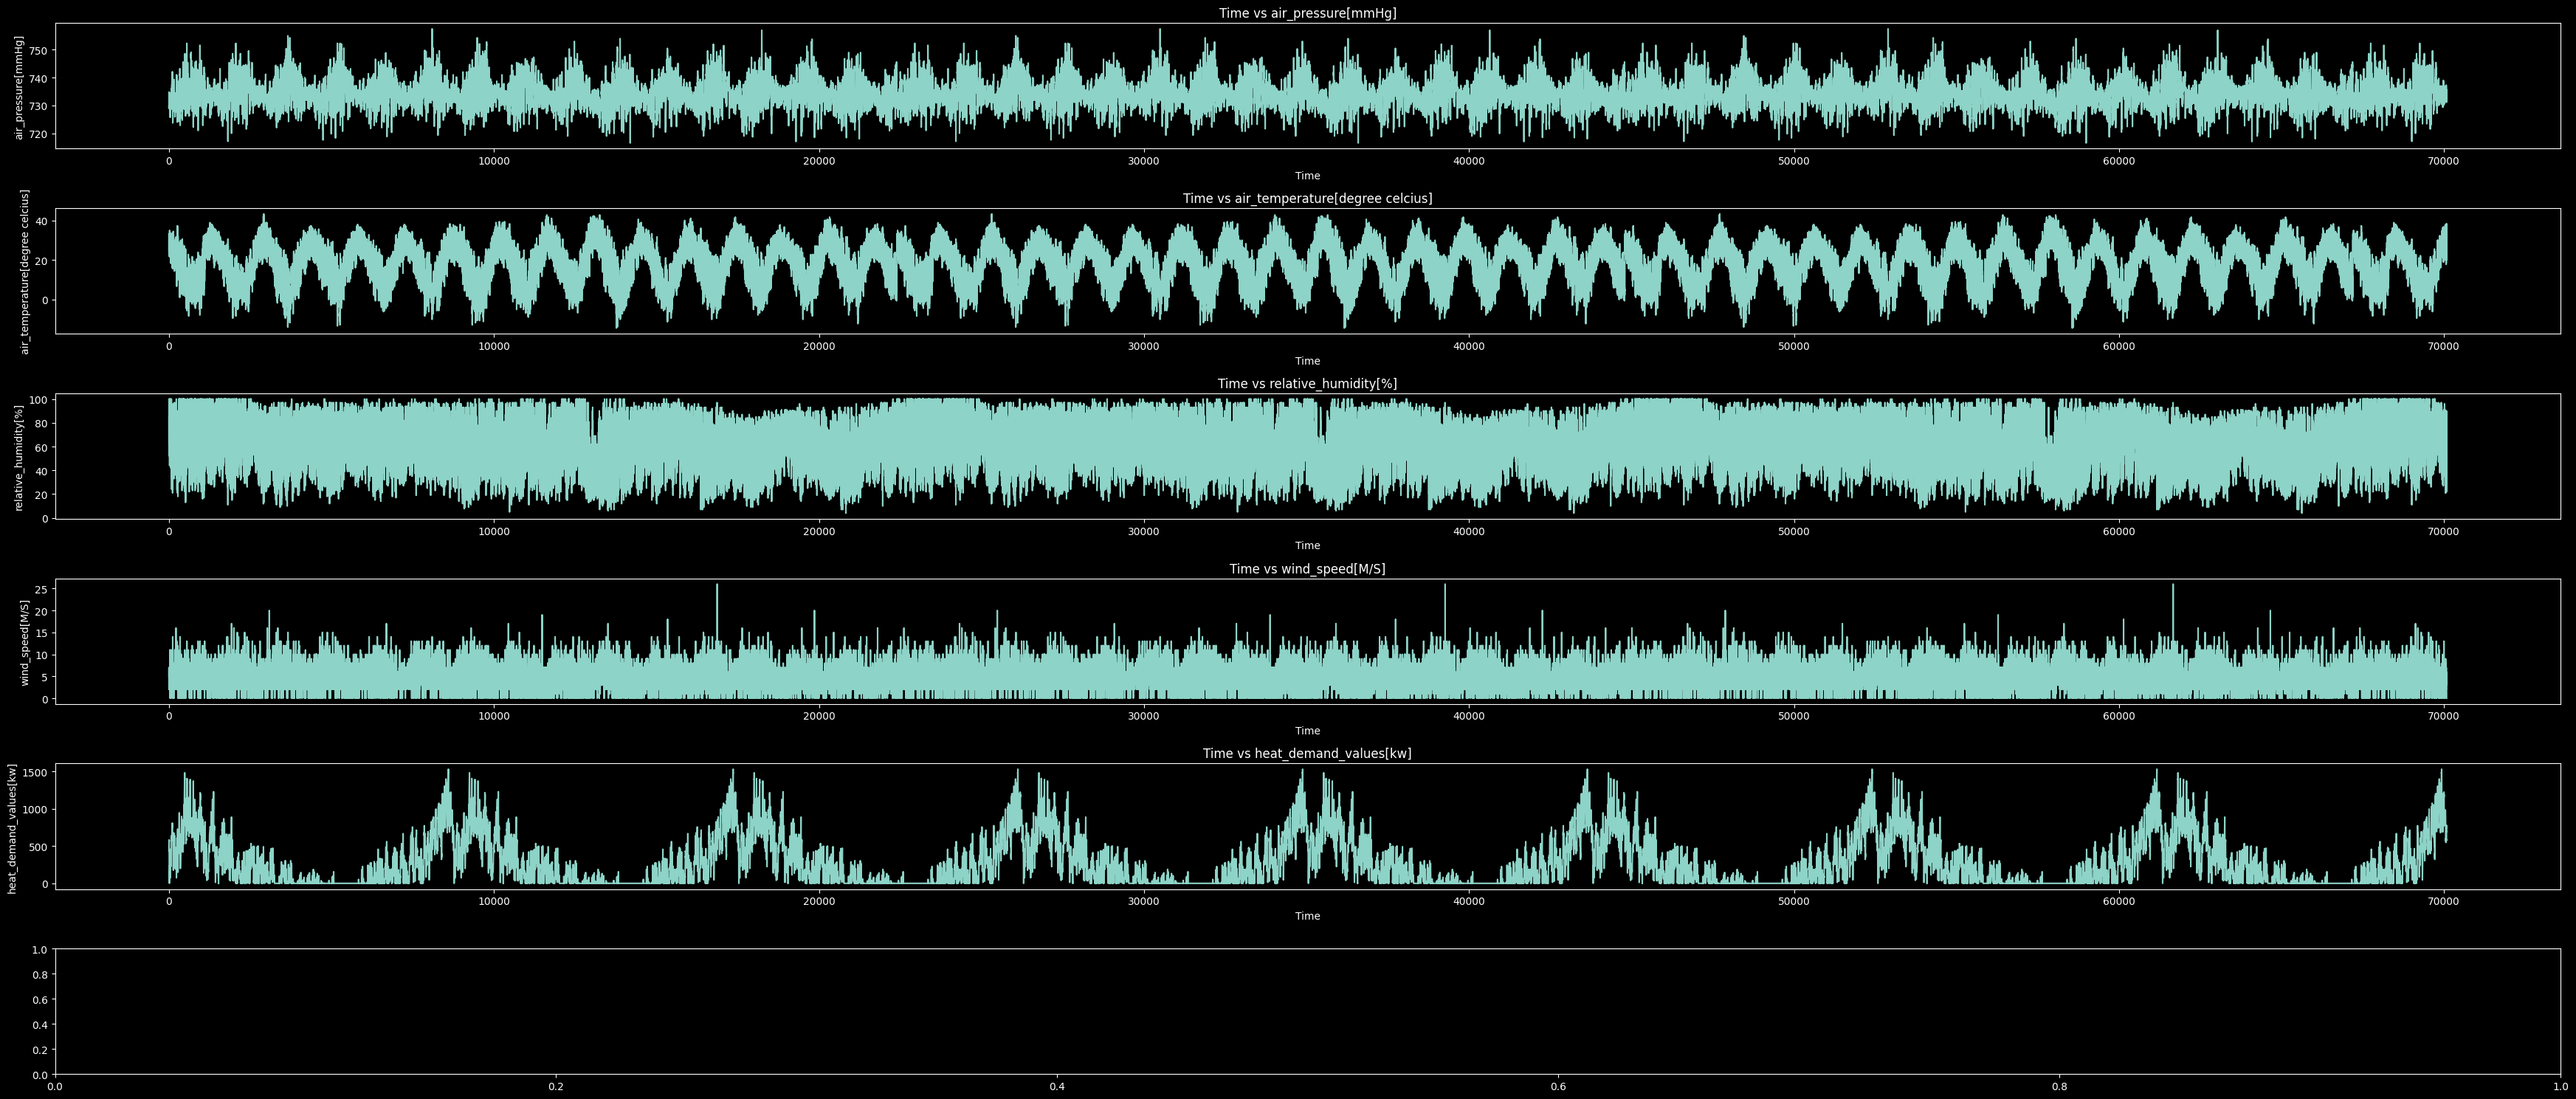

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
df = pd.read_csv('/content/data (3).csv')
df['Time'] = pd.to_datetime(df['Time'])
df['total_cloud_cover[from ten]']=df['total_cloud_cover[from ten]'].astype(str)
print(df.describe())
df['Time'] = range(len(df))
plt.style.use(style='dark_background')
df.head(10)
#df.dropna(inplace=True)
features = ['air_pressure[mmHg]', 'air_temperature[degree celcius]', 'relative_humidity[%]', 'wind_speed[M/S]', 'heat_demand_values[kw]']
fig, axes = plt.subplots(6,1, figsize=(35, 15))
for i, feature in enumerate(features):
    ax = axes[i]
    sns.lineplot(x=df['Time'], y=df[feature], ax=ax)
    ax.set_title(f'{"Time"} vs {feature}')
    ax.set_xlabel("Time")
    ax.set_ylabel(feature)
plt.tight_layout()
plt.show()

In [ ]:
df.shape

(70080, 9)

In [ ]:
df

,Time,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],wind_speed[M/S],solar_irridiation[W/m^2],total_cloud_cover[from ten],electricity_demand_values[kw],heat_demand_values[kw]
0,0,729.7,25.0,85.0,5.0,0,no clouds,289.567557,432.940036
1,1,729.4,27.8,77.0,7.0,0,no clouds,260.168520,473.935901
2,2,728.9,33.3,62.0,7.0,0,2/10–3/10.,247.273585,483.278761
3,3,731.6,32.2,62.0,2.0,0,5/10.,257.955878,545.921252
4,4,732.6,22.8,96.0,3.0,0,2/10–3/10.,258.255081,550.526112
...,...,...,...,...,...,...,...,...,...
70075,70075,733.3,24.4,60.0,3.0,262,no clouds,379.637300,626.192823
70076,70076,733.6,27.8,56.0,4.0,0,no clouds,369.976634,609.519358
70077,70077,732.1,38.3,22.0,0.0,0,no clouds,365.009491,571.465130
70078,70078,735.3,36.7,25.0,4.0,0,no clouds,396.966494,583.703242


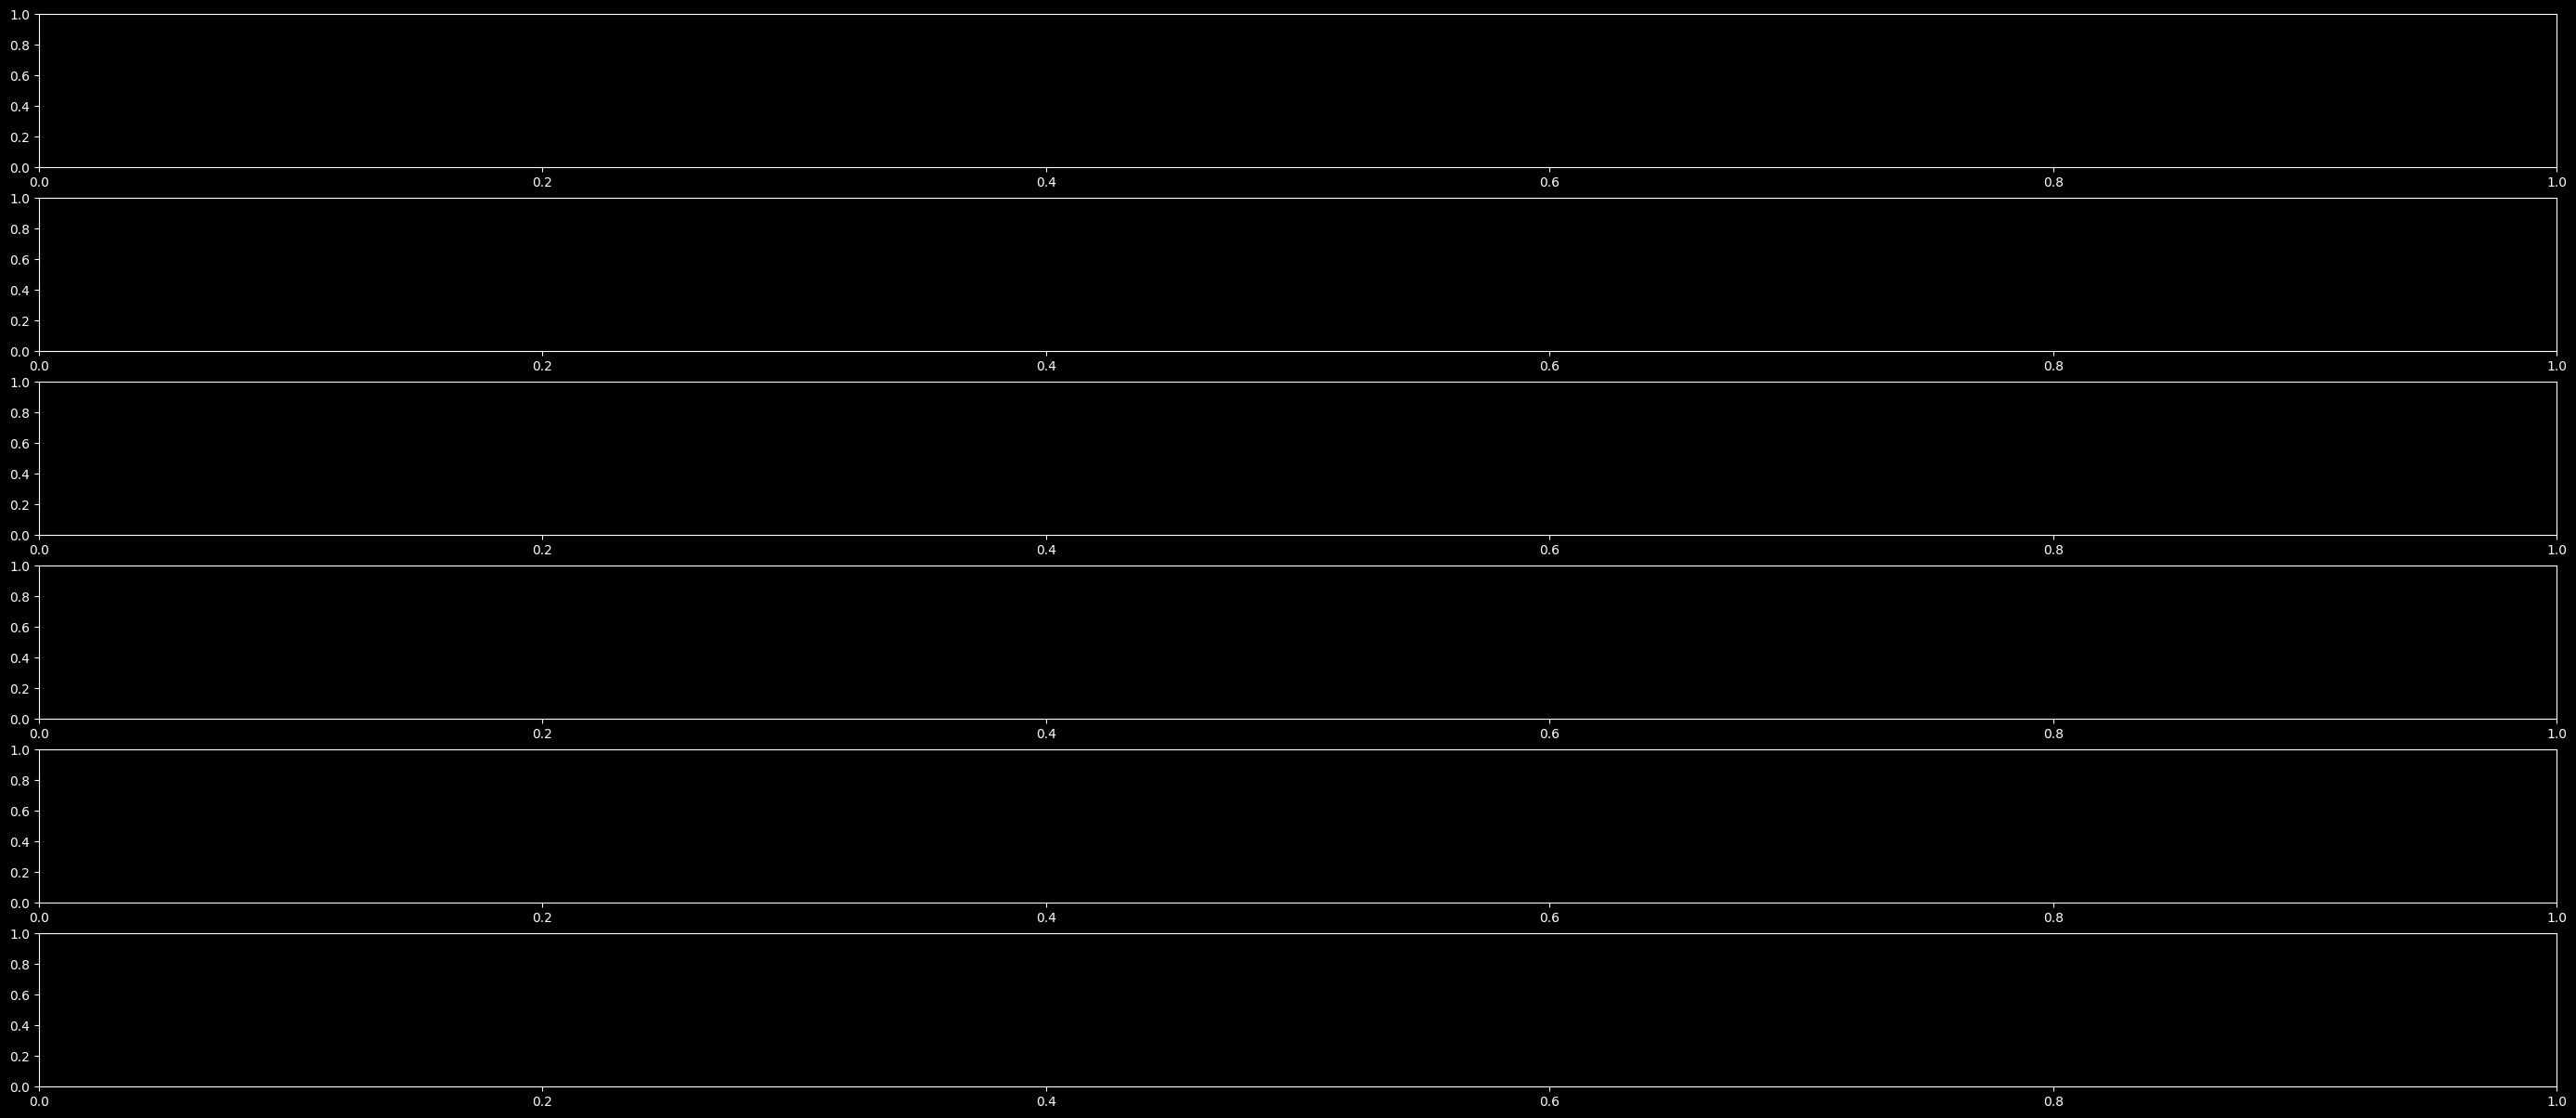

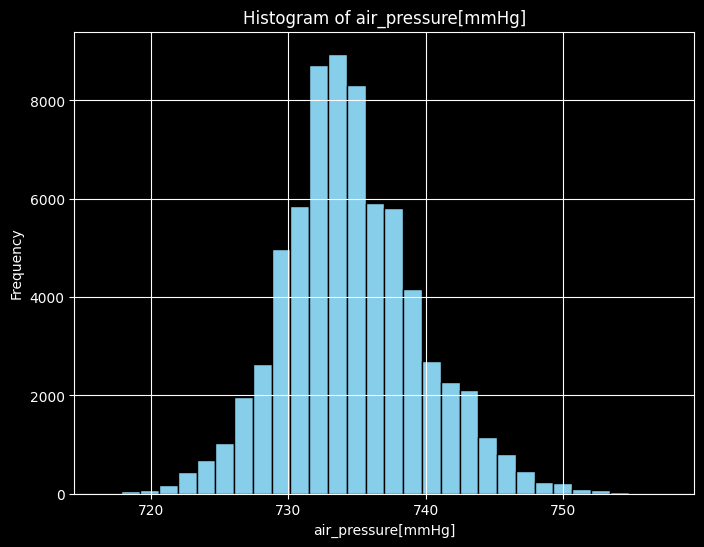

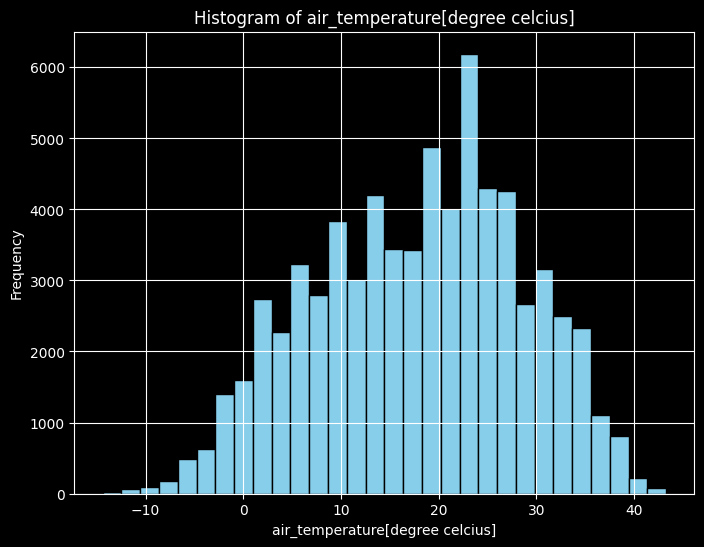

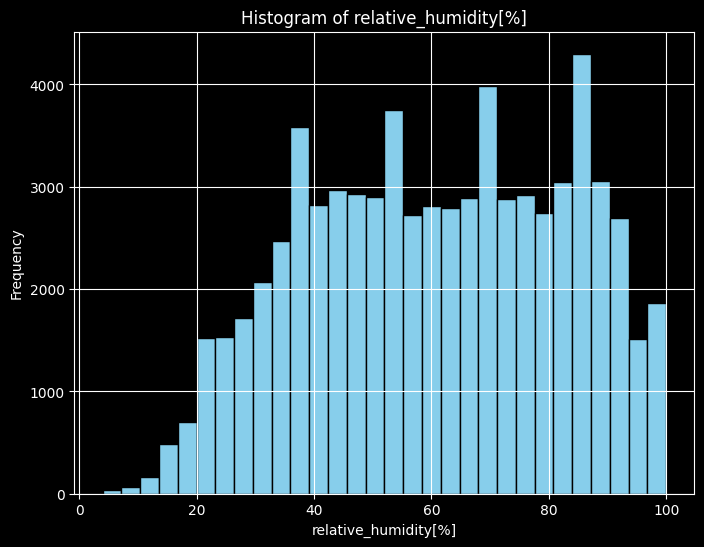

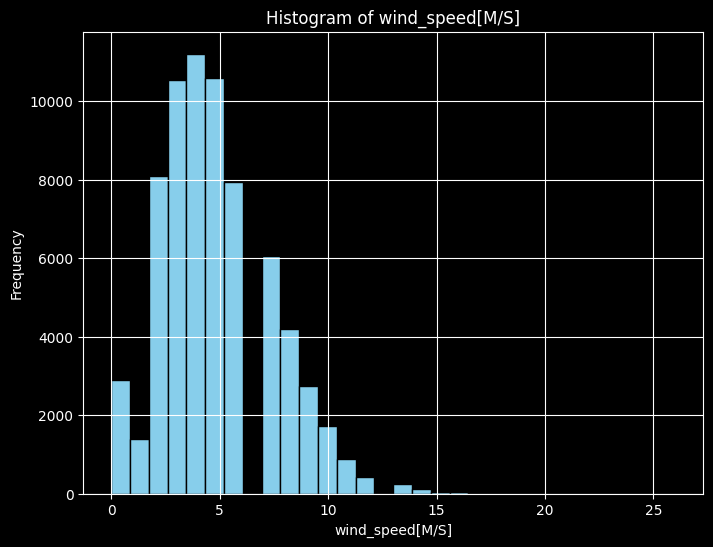

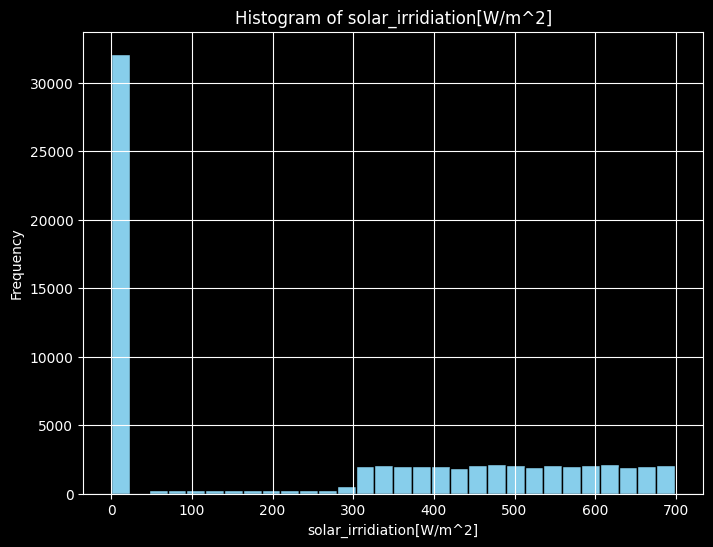

In [ ]:
features_2=['air_pressure[mmHg]', 'air_temperature[degree celcius]', 'relative_humidity[%]', 'wind_speed[M/S]', 'solar_irridiation[W/m^2]']
fig, axes = plt.subplots(6,1, figsize=(35, 15))
for feature in features_2:
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


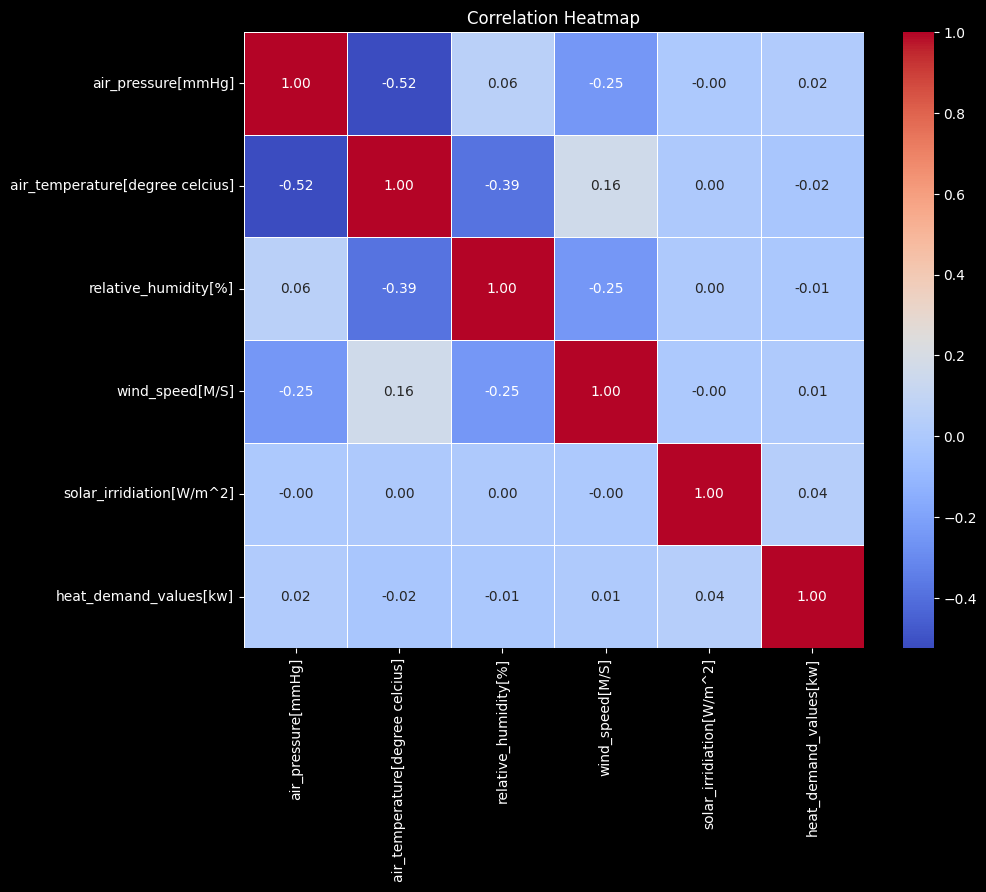

In [ ]:
correlation_matrix = df[features].corr()

# Create a heatmap with correlation values labeled
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df.describe()

,Time,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],wind_speed[M/S],solar_irridiation[W/m^2],electricity_demand_values[kw],heat_demand_values[kw]
count,70080.000000,69934.000000,69903.000000,69903.000000,69125.000000,70080.000000,70073.000000,70073.000000
mean,35039.500000,734.588143,17.871834,60.644178,4.828268,257.293094,393.888975,263.506355
std,20230.497769,5.011322,10.683280,22.007274,2.598960,258.725788,239.189061,314.704564
min,0.000000,716.500000,-14.400000,4.000000,0.000000,0.000000,112.947618,0.000000
25%,17519.750000,731.400000,10.000000,43.000000,3.000000,0.000000,227.707914,0.000000
50%,35039.500000,734.200000,18.900000,61.000000,5.000000,299.500000,323.093703,137.281603
75%,52559.250000,737.500000,25.600000,79.000000,6.000000,499.000000,476.911512,448.289876
max,70079.000000,757.500000,43.300000,100.000000,26.000000,699.000000,1592.893206,1529.168786


In [ ]:
from functools import cache
def transform_value(value):
    # if '/' in value and not re.search('[a-z–]',value):
    if isinstance(value, str) and '/' in value and not re.search('[a-z–]',value):
            parts = value.split('/')
            numerator = float(parts[0])
            denominator =float(parts[1])
            return numerator / denominator
    elif '–' in str(value):
            parts = value.split('–')
            lower = float(parts[0][0])
            #print("HI")
            #print(parts[1][:-1])
            upper = float(parts[1][-5])
            return (lower + upper) / 2.0
    elif 'no clouds' in str(value).lower():
        return 0.0
    else:
        try:
            return float(value)
        except ValueError:
            return 0.5


%timeit df['total_cloud_cover[from ten]'] = df['total_cloud_cover[from ten]'].apply(transform_value)

df

158 ms ± 28.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


,Time,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],wind_speed[M/S],solar_irridiation[W/m^2],total_cloud_cover[from ten],electricity_demand_values[kw],heat_demand_values[kw]
0,0,729.7,25.0,85.0,5.0,0,0.0,289.567557,432.940036
1,1,729.4,27.8,77.0,7.0,0,0.0,260.168520,473.935901
2,2,728.9,33.3,62.0,7.0,0,2.5,247.273585,483.278761
3,3,731.6,32.2,62.0,2.0,0,0.5,257.955878,545.921252
4,4,732.6,22.8,96.0,3.0,0,2.5,258.255081,550.526112
...,...,...,...,...,...,...,...,...,...
70075,70075,733.3,24.4,60.0,3.0,262,0.0,379.637300,626.192823
70076,70076,733.6,27.8,56.0,4.0,0,0.0,369.976634,609.519358
70077,70077,732.1,38.3,22.0,0.0,0,0.0,365.009491,571.465130
70078,70078,735.3,36.7,25.0,4.0,0,0.0,396.966494,583.703242


In [ ]:

import statsmodels.api as sm


In [ ]:
df.columns

Index(['Time', 'air_pressure[mmHg]', 'air_temperature[degree celcius]',
       'relative_humidity[%]', 'wind_speed[M/S]', 'solar_irridiation[W/m^2]',
       'total_cloud_cover[from ten]', 'electricity_demand_values[kw]',
       'heat_demand_values[kw]'],
      dtype='object')

In [ ]:
df.describe()

,Time,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],wind_speed[M/S],solar_irridiation[W/m^2],total_cloud_cover[from ten],electricity_demand_values[kw],heat_demand_values[kw]
count,70080.000000,69934.000000,69903.000000,69903.000000,69125.000000,70080.000000,69837.000000,70073.000000,70073.000000
mean,35039.500000,734.588143,17.871834,60.644178,4.828268,257.293094,1.474651,393.888975,263.506355
std,20230.497769,5.011322,10.683280,22.007274,2.598960,258.725788,2.473107,239.189061,314.704564
min,0.000000,716.500000,-14.400000,4.000000,0.000000,0.000000,0.000000,112.947618,0.000000
25%,17519.750000,731.400000,10.000000,43.000000,3.000000,0.000000,0.000000,227.707914,0.000000
50%,35039.500000,734.200000,18.900000,61.000000,5.000000,299.500000,0.000000,323.093703,137.281603
75%,52559.250000,737.500000,25.600000,79.000000,6.000000,499.000000,1.000000,476.911512,448.289876
max,70079.000000,757.500000,43.300000,100.000000,26.000000,699.000000,7.500000,1592.893206,1529.168786


In [ ]:
for feature in df.columns[1:]:  #To eliminate seasonality and stabilize the mean
    df[feature] = df[feature].diff()

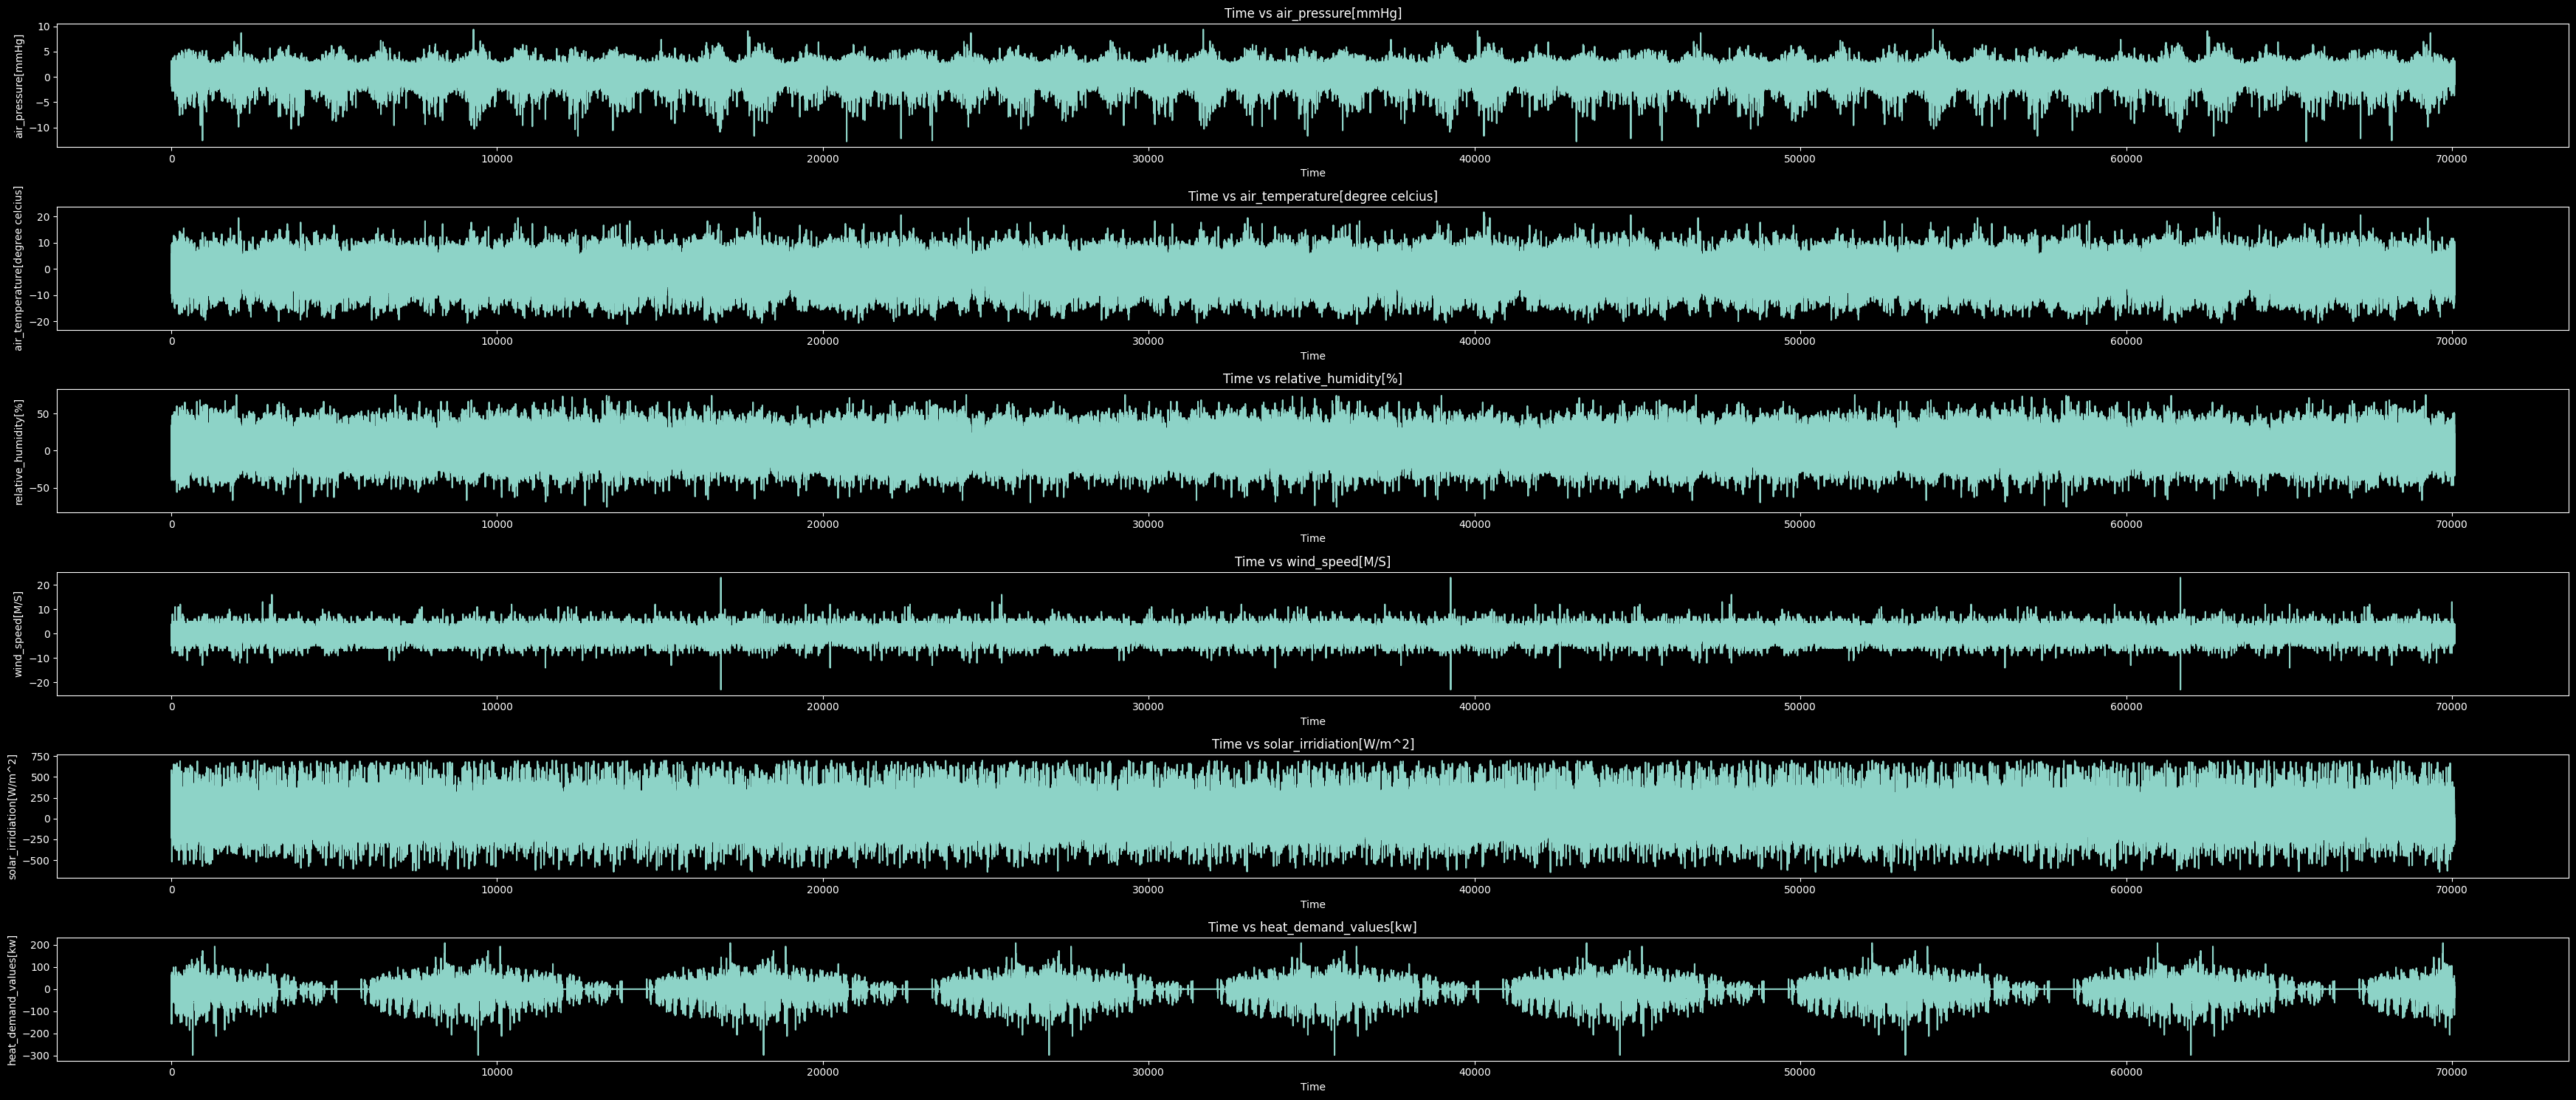

In [ ]:
plt.style.use(style='dark_background')

# sns.set_style("whitegrid")
fig, axes = plt.subplots(6,1, figsize=(35, 15))
for i, feature in enumerate(features):
    ax = axes[i]
    sns.lineplot(x=df['Time'], y=df[feature], ax=ax)
    ax.set_title(f'{"Time"} vs {feature}')
    ax.set_xlabel("Time")
    ax.set_ylabel(feature)
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler

def preprocess_dataframe(df, X):
    for col in X:
        df[col].fillna(df[col].mean(), inplace=True)
        decomposition = seasonal_decompose(df[col], model='additive', period=12)
        df[col] = df[col] - decomposition.seasonal
        model = ExponentialSmoothing(df[col])
        model_fit = model.fit()
        df[col] = model_fit.fittedvalues
    scaler = MinMaxScaler()
    df[X] = scaler.fit_transform(df[X])
    return df
preprocessed_df = preprocess_dataframe(df, features)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
df.shape

(70080, 9)

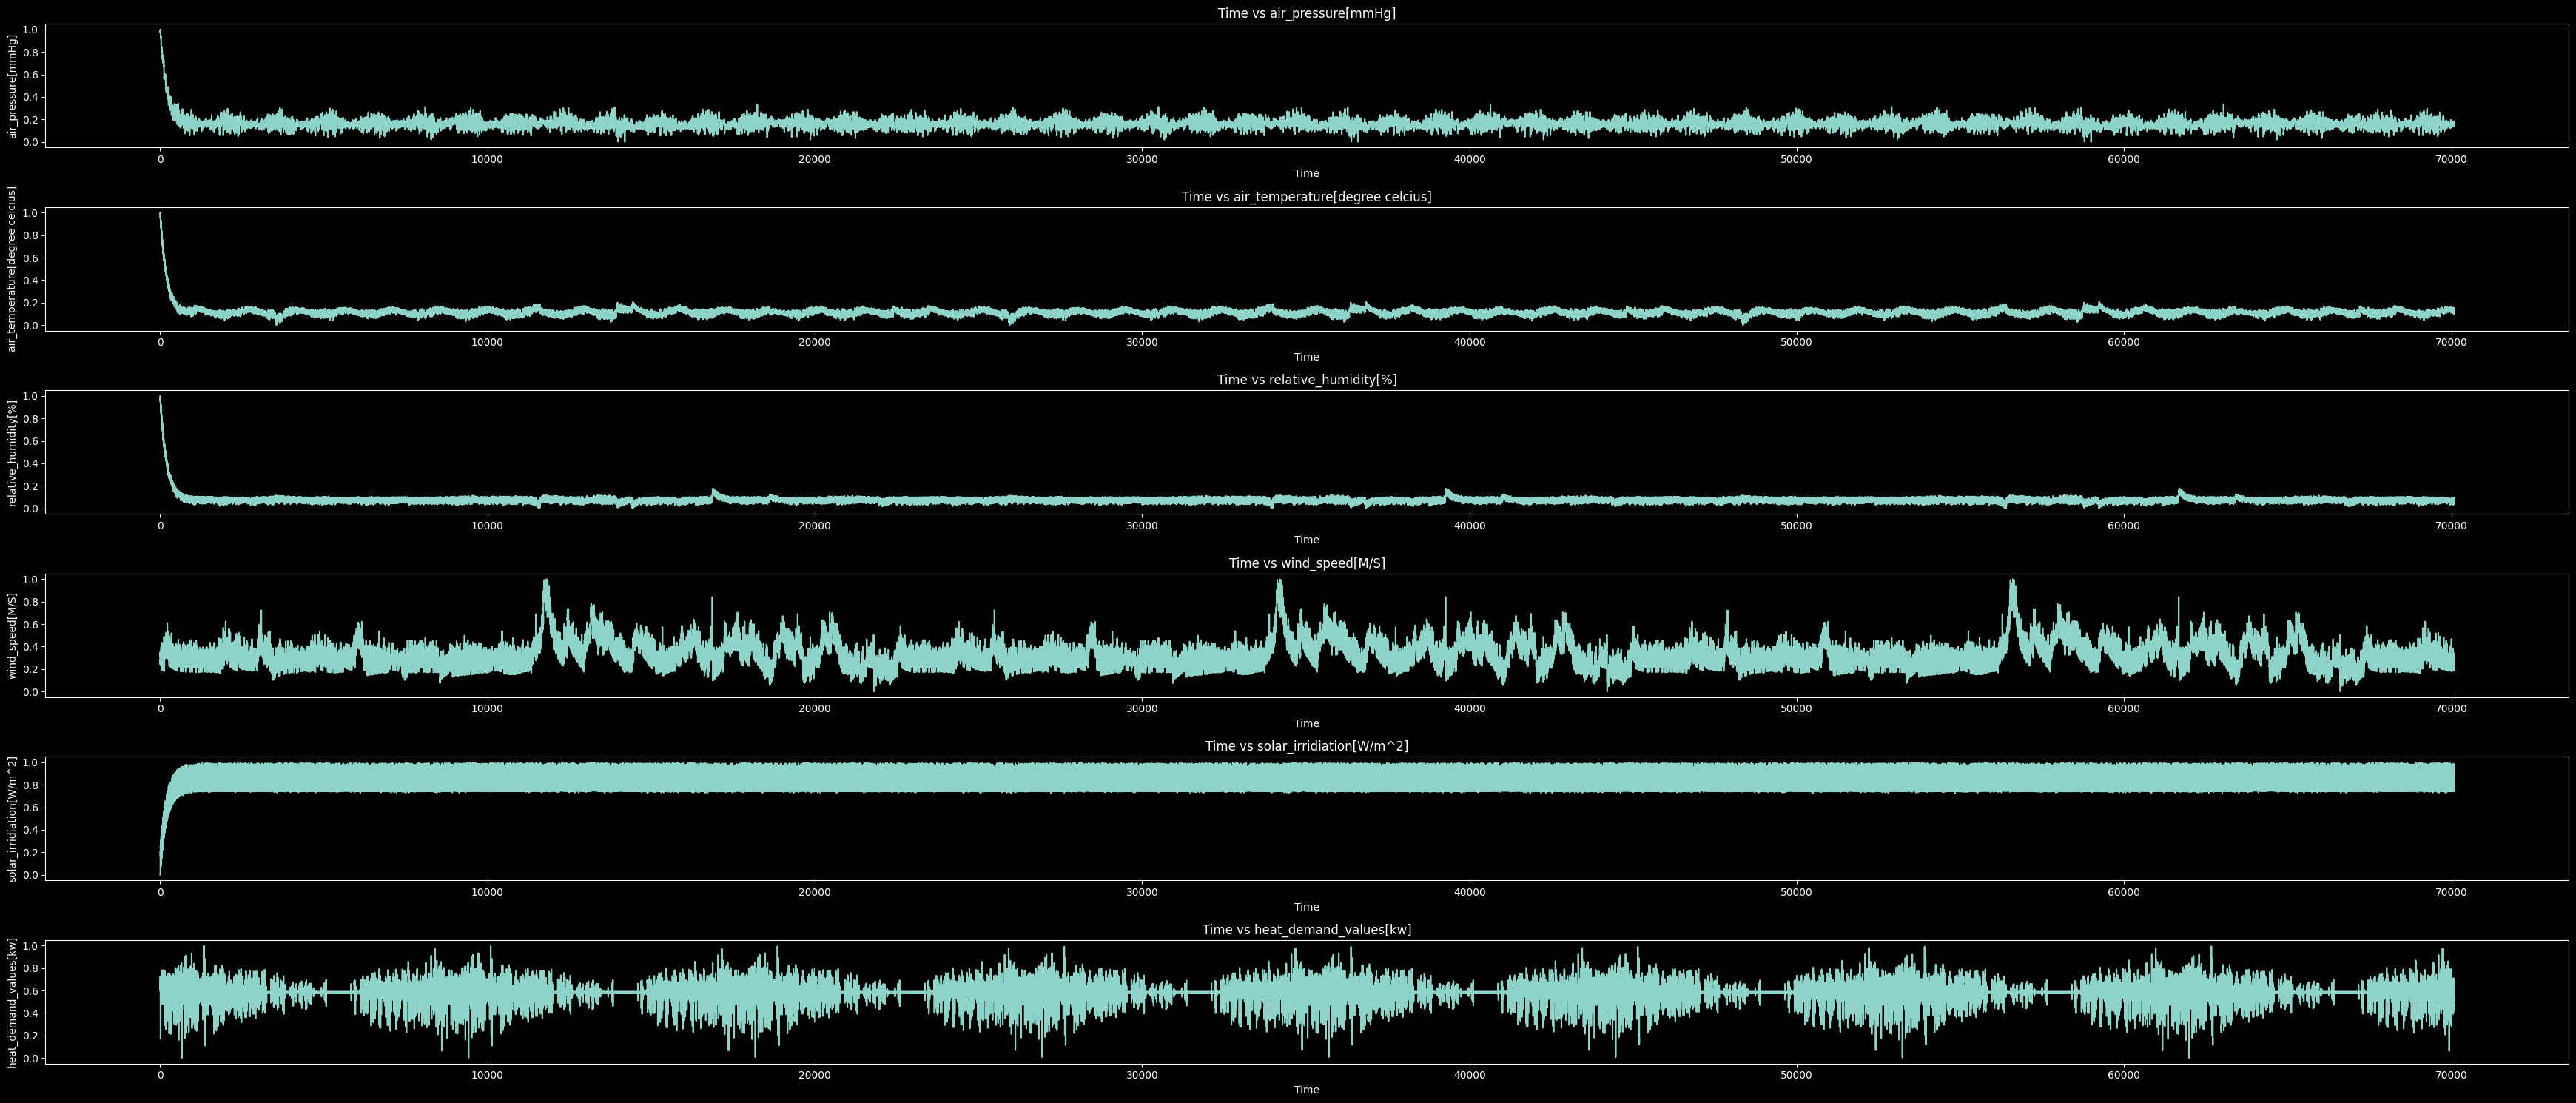

In [ ]:
# sns.set_style("whitegrid")
plt.style.use(style='dark_background')
fig, axes = plt.subplots(6,1, figsize=(35, 15))
for i, feature in enumerate(features):
    ax = axes[i]
    sns.lineplot(x=df['Time'], y=df[feature], ax=ax)
    ax.set_title(f'{"Time"} vs {feature}')
    ax.set_xlabel("Time")
    ax.set_ylabel(feature)
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
df[features]


,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],wind_speed[M/S],solar_irridiation[W/m^2],heat_demand_values[kw]
0,0.994246,0.991064,1.000000,0.308737,0.000000,0.644812
1,0.990195,0.986675,0.995297,0.307968,0.003651,0.617629
2,0.984014,0.989197,0.984775,0.349845,0.007163,0.673157
3,0.975681,1.000000,0.967007,0.350560,0.012397,0.650070
4,0.992207,0.992923,0.962150,0.241589,0.016608,0.725310
...,...,...,...,...,...,...
70075,0.159741,0.143393,0.047926,0.250543,0.887791,0.425201
70076,0.153473,0.116561,0.067387,0.250636,0.804830,0.436381
70077,0.155743,0.126162,0.063536,0.272720,0.743474,0.474712
70078,0.144768,0.153704,0.035415,0.183231,0.743273,0.460592


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
features_2 = ['air_pressure[mmHg]', 'air_temperature[degree celcius]', 'relative_humidity[%]', 'wind_speed[M/S]', 'solar_irridiation[W/m^2]','total_cloud_cover[from ten]']


In [ ]:
X=df[features].drop(columns=['heat_demand_values[kw]'])
y=df['heat_demand_values[kw]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshape input to be 3D [samples, timesteps, features]
X_train_lstm = X_train.to_numpy().reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.to_numpy().reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train the model
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Evaluate
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
print(f'LSTM MSE: {mse_lstm}')


Epoch 1/10
1402/1402 [==============================] - 7s 4ms/step - loss: 0.0217 - val_loss: 0.0080
Epoch 2/10
1402/1402 [==============================] - 4s 3ms/step - loss: 0.0064 - val_loss: 0.0081
Epoch 3/10
1402/1402 [==============================] - 4s 3ms/step - loss: 0.0063 - val_loss: 0.0082
Epoch 4/10
1402/1402 [==============================] - 5s 4ms/step - loss: 0.0063 - val_loss: 0.0083
Epoch 5/10
1402/1402 [==============================] - 4s 3ms/step - loss: 0.0063 - val_loss: 0.0083
Epoch 6/10
1402/1402 [==============================] - 4s 3ms/step - loss: 0.0063 - val_loss: 0.0083
Epoch 7/10
1402/1402 [==============================] - 5s 3ms/step - loss: 0.0063 - val_loss: 0.0083
Epoch 8/10
1402/1402 [==============================] - 4s 3ms/step - loss: 0.0063 - val_loss: 0.0082
Epoch 9/10
1402/1402 [==============================] - 4s 3ms/step - loss: 0.0063 - val_loss: 0.0081
Epoch 10/10
438/438 [==============================] - 1s 2ms/step
LSTM MSE: 0.008

In [ ]:
len(y_pred_lstm)

14016

In [ ]:
y_pred_lstm=y_pred_lstm.ravel()

In [ ]:
len(y_pred_lstm)

14016

In [ ]:
x=np.arange(1,14017)
len(x)

14016

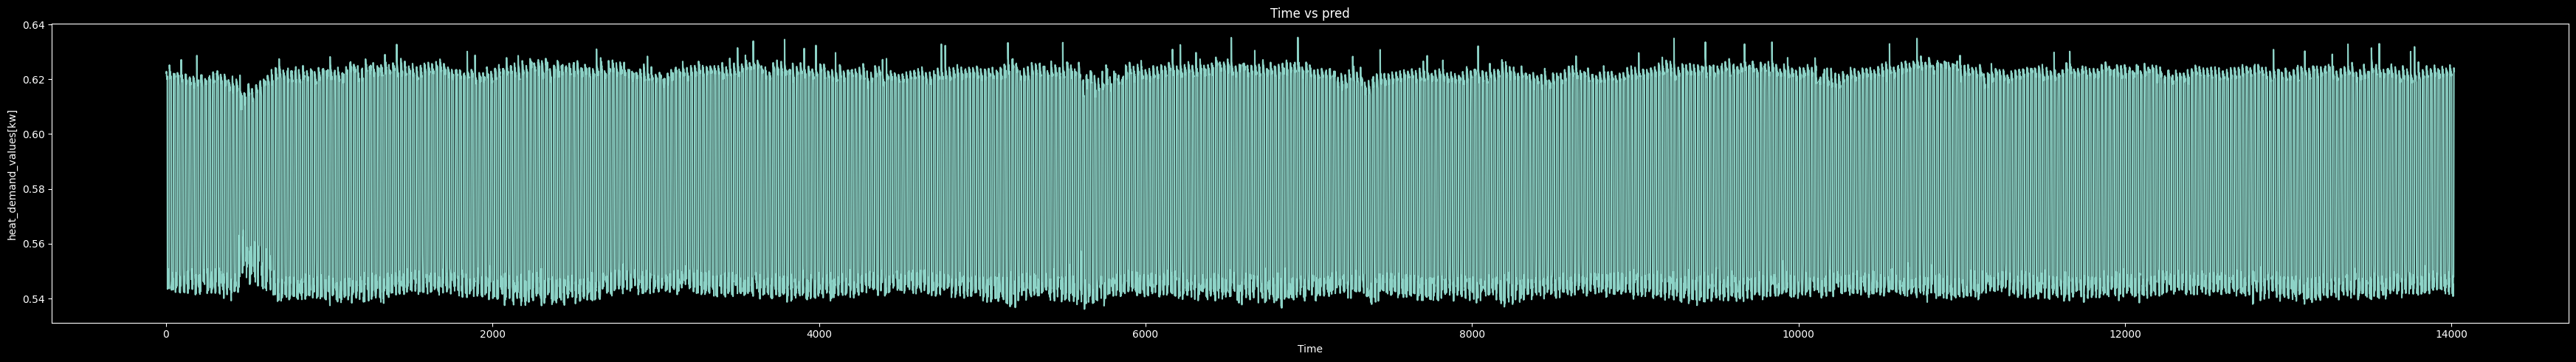

In [ ]:
plt.style.use(style='dark_background')
fig, ax = plt.subplots(1,1, figsize=(35, 5))
sns.lineplot(x=np.arange(1,14017), y=y_pred_lstm, ax=ax)
ax.set_title(f'{"Time"} vs {"pred"}')
ax.set_xlabel("Time")
ax.set_ylabel(feature)
plt.tight_layout()
plt.show()